# Supervised learning project

Here we will arbitrarily asign labels to the spotify songs data in order to turn the problem of clasifying it into a supervised problem. We will then make a couple of models for this task.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import import_ipynb
import un
#from sklearn.manifold import TSNE


## Lets start with getting the data ready

In [2]:
# songs= pd.read_excel('dataSong.xlsx')
# songs

The above data, once put through the same cleaning as on the unsupervised work, Will be transformed by t-SNE into R^2 and R^3 spaces. Models will be trained using all three of these datasets.

In [3]:
# songs.dropna(inplace=True)
# songs['index']=songs['index'].astype('int32')
# songs.set_index('index',inplace=True)
# songs.drop(['id','youtube','ytTitle','date','hiddenSubscriberCount','channelId','favoriteCount'],axis=1,inplace=True)
# songs['name']= songs['name'].str.split().apply(len)
# songs.head()

In [4]:
# tsne = TSNE(n_components=2)
# tsner2 = tsne.fit_transform(songs) 
# r2= pd.DataFrame()
# r2["x"] = tsner2[:,0]
# r2["y"] = tsner2[:,1]
# r2

In [5]:
# tsne = TSNE(n_components=3)
# tsner3 = tsne.fit_transform(songs) 
# r3= pd.DataFrame()
# r3["x"] = tsner3[:,0]
# r3["y"] = tsner3[:,1]
# r3["z"] = tsner3[:,2]
# r3

In [6]:
def plot2d(r2,title='2D representation of songs'):
    if 'label' in list(r2.columns):
        plt.scatter(
            r2['x'],
            r2['y'],
            c=[sns.color_palette()[x] for x in r2.label]
            )
    else: plt.scatter(r2['x'],r2['y'])
    plt.gca().set_aspect('equal', 'datalim')
    plt.title(title, fontsize=12)

#plot2d(r2)

In [7]:
def plot3d(r3,title='3D representation of songs'):
    ax = plt.axes(projection='3d')
    if 'label' in list(r3.columns):
        ax.scatter3D(
            r3['x'],
            r3['y'],
            r3['z'],
            c=[sns.color_palette()[x] for x in r3.label]
            )
    else: ax.scatter3D(r3['x'],r3['y'],r3['z'])
    plt.title(title, fontsize=12)
#plot3d(r3)

## Now I will arbitrarily give the data labels chosen from the mountain model outputs

In [8]:
# df2,c2= un.mount(un.normalize(r2),5,un.mahala,100)
# df2= pd.concat([r2,df2.label], axis=1)
# plot2d(df2,'2D labeled data')
# df2.to_excel('twoddata.xlsx',index=False)

In [9]:
# df3,c3= un.mount(un.normalize(r3),5,un.mahala,100)
# df3= pd.concat([r3,df3.label], axis=1)
# plot3d(df3,'3D labeled data')
# df3.to_excel('threeddata.xlsx',index=False)

In [10]:
# dfn= pd.concat([songs.reset_index().drop('index',axis=1),df2.label],axis=1)
# plot2d(pd.concat([r2,dfn.label],axis=1),'R^n labeled data displayed in r^2')
# dfn.to_excel('labeleddata.xlsx',index=False)

## From here on, I only need to work with the dataframes on the excel files

In [11]:
df2= pd.read_excel('twoddata.xlsx')
df3= pd.read_excel('threeddata.xlsx')
dfn= pd.read_excel('labeleddata.xlsx')

x2= df2[['x','y']]
y2= df2['label']
x3= df3[['x','y','z']]
y3= df3['label']
xn= dfn.iloc[:,:-1]
yn= dfn['label']

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.svm import SVC

In [13]:
x2train, x2test, y2train, y2test = train_test_split(x2, y2)
x3train, x3test, y3train, y3test = train_test_split(x3, y3)
xntrain, xntest, yntrain, yntest = train_test_split(xn, yn)

## Linear models for supervised problem

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


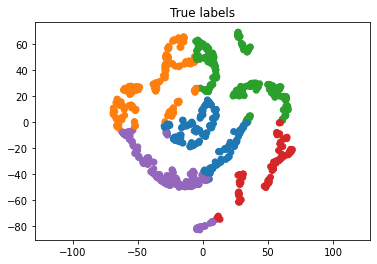

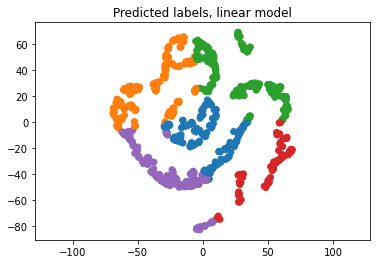

In [14]:
model1= LogisticRegression(multi_class='multinomial')#.fit(X=x2train, y=y2train)
model1.fit(X=x2train, y=y2train)
pred1=model1.predict(x2test)
plot2d(pd.concat([x2test,y2test],axis=1),title='True labels')
plt.show()
mod1plot= x2test.copy()
mod1plot['label']= pred1
plot2d(mod1plot,title='Predicted labels, linear model')

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


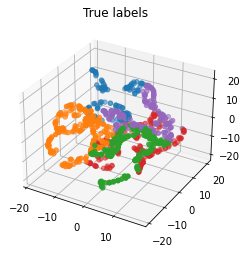

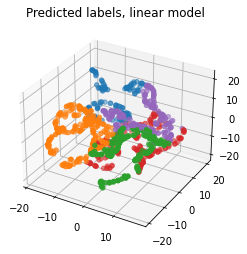

In [15]:
model2= LogisticRegression(multi_class='multinomial')#.fit(X=x2train, y=y2train)
model2.fit(X=x3train, y=y3train)
pred2=model2.predict(x3test)
plot3d(pd.concat([x3test,y3test],axis=1),title='True labels')
plt.show()
mod2plot= x3test.copy()
mod2plot['label']= pred2
plot3d(mod2plot,title='Predicted labels, linear model')

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


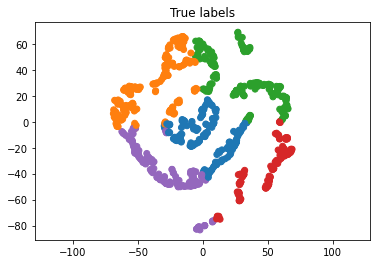

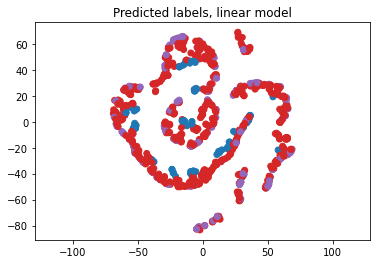

In [16]:
model3= LogisticRegression(multi_class='multinomial')#.fit(X=x2train, y=y2train)
model3.fit(X=xntrain, y=yntrain)
pred3=model3.predict(xntest)
plot2d(pd.concat([df2.iloc[yntest.index,:-1],yntest],axis=1),title='True labels')
plt.show()
mod3plot= df2.iloc[xntest.index,:-1]
mod3plot['label']= pred3
plot2d(mod3plot,title='Predicted labels, linear model')

## Decision Tree models

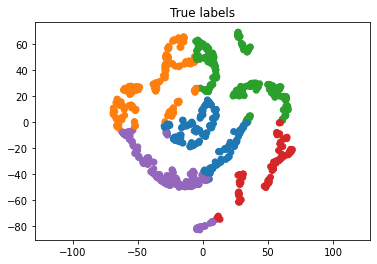

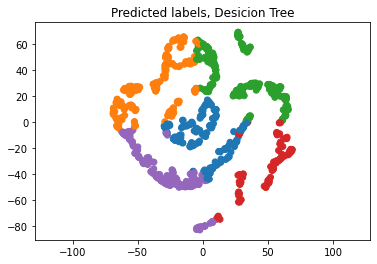

In [17]:
model4 = DecisionTreeClassifier()
model4.fit(x2train,y2train)
plot2d(pd.concat([x2test,y2test],axis=1),title='True labels')
plt.show()
pred4= model4.predict(x2test)
mod4plot= x2test.copy()
mod4plot['label']= pred4
plot2d(mod4plot,title='Predicted labels, Desicion Tree')

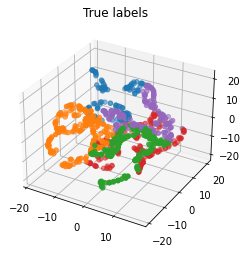

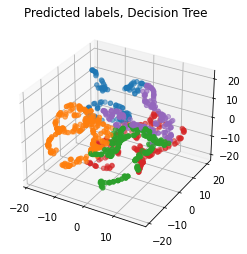

In [18]:
model5=DecisionTreeClassifier()
model5.fit(X=x3train, y=y3train)
plot3d(pd.concat([x3test,y3test],axis=1),title='True labels')
plt.show()
pred5=model5.predict(x3test)
mod5plot= x3test.copy()
mod5plot['label']= pred5
plot3d(mod5plot,title='Predicted labels, Decision Tree')

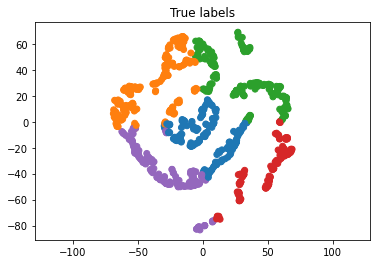

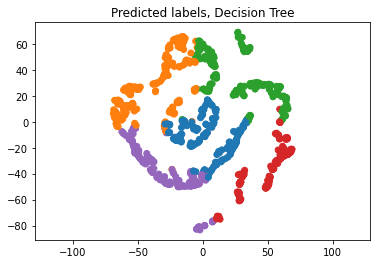

In [19]:
model6= DecisionTreeClassifier()
model6.fit(X=xntrain, y=yntrain)
plot2d(pd.concat([df2.iloc[yntest.index,:-1],yntest],axis=1),title='True labels')
plt.show()
pred6=model6.predict(xntest)
mod6plot= df2.iloc[xntest.index,:-1]
mod6plot['label']= pred6
plot2d(mod6plot,title='Predicted labels, Decision Tree')

## SVM

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(x2train)
x2trains = scaling.transform(x2train)
x2tests = scaling.transform(x2test)

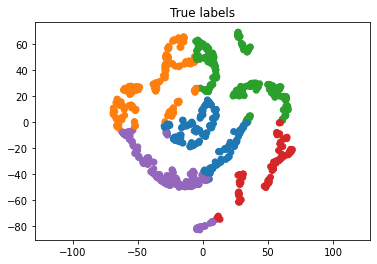

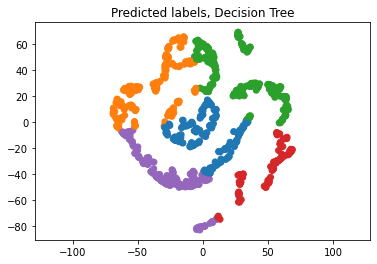

In [23]:
model7= SVC(kernel='linear')
model7.fit(X=x2trains, y=y2train)
plot2d(pd.concat([df2.iloc[y2test.index,:-1],y2test],axis=1),title='True labels')
plt.show()
pred7=model7.predict(x2tests)
mod7plot= df2.iloc[x2test.index,:-1]
mod7plot['label']= pred7
plot2d(mod7plot,title='Predicted labels, Decision Tree')

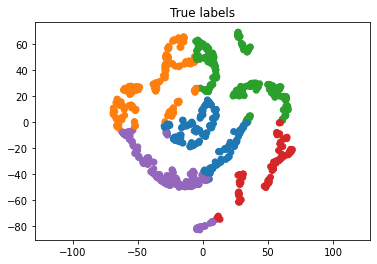

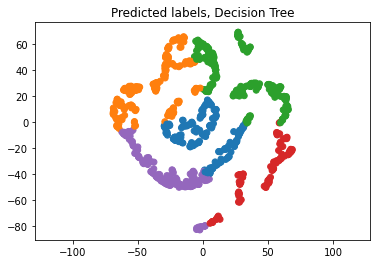

In [24]:
model8= SVC(kernel='rbf')
model8.fit(X=x2trains, y=y2train)
plot2d(pd.concat([df2.iloc[y2test.index,:-1],y2test],axis=1),title='True labels')
plt.show()
pred8=model8.predict(x2tests)
mod8plot= df2.iloc[x2test.index,:-1]
mod8plot['label']= pred8
plot2d(mod8plot,title='Predicted labels, Decision Tree')

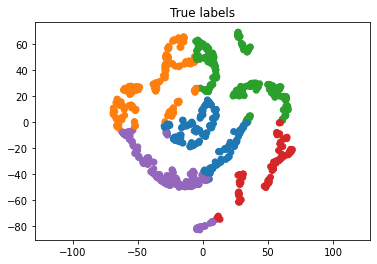

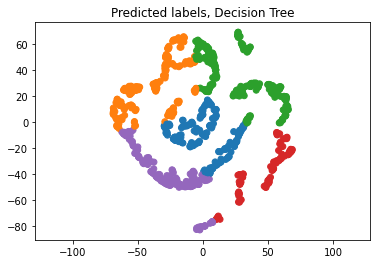

In [25]:
model9= SVC(kernel='poly')
model9.fit(X=x2trains, y=y2train)
plot2d(pd.concat([df2.iloc[y2test.index,:-1],y2test],axis=1),title='True labels')
plt.show()
pred9=model9.predict(x2tests)
mod9plot= df2.iloc[x2test.index,:-1]
mod9plot['label']= pred9
plot2d(mod9plot,title='Predicted labels, Decision Tree')

## Perceptron

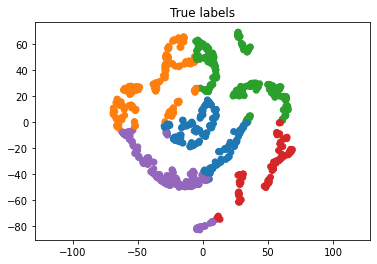

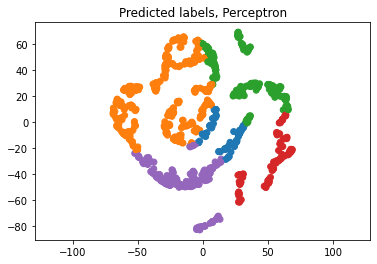

In [29]:
from sklearn.linear_model import Perceptron
tron = Perceptron()
tron.fit(X=x2trains, y=y2train)
plot2d(pd.concat([df2.iloc[y2test.index,:-1],y2test],axis=1),title='True labels')
plt.show()
pred10=tron.predict(x2tests)
mod10plot= df2.iloc[x2test.index,:-1]
mod10plot['label']= pred10
plot2d(mod10plot,title='Predicted labels, Perceptron')

## See quality of models

In [30]:
#see how good
from sklearn.metrics import multilabel_confusion_matrix

In [52]:
#mods= [pred1, pred4,pred7,pred8,pred9,pred10]
models= {'linear':pred1,'tree':pred4,'svml':pred7,'svmr':pred8,'svmp':pred9,'perceptron':pred10}
out={'linear':[],'tree':[],'svml':[],'svmr':[],'svmp':[],'perceptron':[]}
for j in out:
    confu=multilabel_confusion_matrix(y_true=y2test,y_pred=models[j])
    r=[0 for i in range(5)]
    for i in range(5):
        cur= confu[i]
        r[i]= round(cur[0,0]/(cur[0,0]+cur[1,0]),4)
    out[j]= r
pd.DataFrame.from_dict(out, orient='index',columns=[1,2,3,4,5])

,1,2,3,4,5
linear,1.0000,1.0000,1.0000,1.0000,0.9987
tree,0.9960,1.0000,0.9943,1.0000,0.9907
svml,0.9960,0.9987,0.9943,0.9952,0.9933
svmr,0.9960,0.9987,0.9986,0.9976,0.9816
svmp,0.9973,1.0000,1.0000,0.9964,0.9907
perceptron,0.8646,1.0000,0.9353,0.9928,0.9540
